In [2]:
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch import nn
from facenet_pytorch import MTCNN
from torch.utils.data import Dataset, DataLoader
from torchvision.utils import save_image
import os
import pandas as pd
from torchvision import transforms as tfs
import random

In [3]:
class MTCNN_Dataset(Dataset):
    def __init__(self, imgs_path, labels_path, mode, subset=None, transform=None):
        super().__init__()
        self.imgs_folder = imgs_path
        self.labels = pd.read_csv(labels_path, sep=" ", header=None)
        self.transform = transform
        self.mode = mode

        if mode == 'rec':
            if subset == 'train':
                labels = self.labels[:162770]
            elif subset == 'val':
                labels = self.labels[162770:182637]
            elif subset == 'test':
                labels = self.labels[182637:]
            elif subset == 'all':
                labels = self.labels

    def __len__(self):
        if self.mode == 'rec':
            return len(labels)
        else:
            return len(self.labels)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        if self.mode == 'rec':
            img_name, label = labels.iloc[idx]
            img_path = os.path.join(imgs_path, img_name)
            img = Image.open(img_path)
            if self.transform:
                img = self.transform(img)
            return img, label
        elif self.mode == 'detect':
            img_name = self.labels.iloc[:, 0].iloc[idx]
            img_path = os.path.join(imgs_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = torch.tensor(img)
            return img, img_name

In [4]:
imgs_path = '/kaggle/input/celeba-dataset/img_align_celeba/img_align_celeba'
labels_path = '/kaggle/input/celeba-identity/identity_CelebA.txt'
full_set = MTCNN_Dataset(imgs_path, labels_path, mode='detect')

In [5]:
dataloader = DataLoader(full_set, 128, shuffle=False)

In [223]:
len(dataloader)

1583

In [185]:
def show_imgs(dataloader, n_imgs):
    batch, _ = next(iter(dataloader))
    imgs = random.sample(batch.tolist(), n_imgs)
    set_size = 0
    if len(imgs) % 2 == 0:
        set_size = 2
    elif len(imgs) % 3 == 0:
        set_size = 3
    else:
        set_size = 1
    n_rows = len(imgs) // set_size
    n_cols = len(imgs) // n_rows
    for img_idx in range(len(imgs)):
        plt.subplot(n_rows, n_cols, img_idx + 1)
        plt.axis('off')
        plt.imshow(imgs[img_idx])
    plt.subplots_adjust(hspace=0.05, wspace=0.05)
    plt.show();

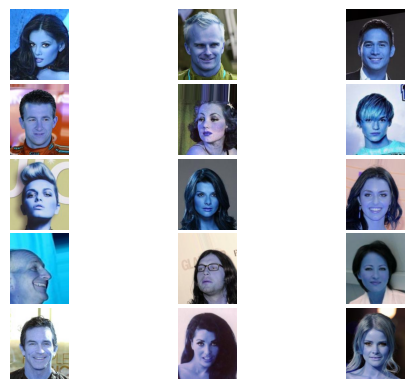

In [186]:
show_imgs(dataloader, 15)

In [6]:
def detect_and_save_batch(model, dir_name, dataloader, device='cuda:0'):
    with torch.inference_mode():
        model.eval()
        bad_imgs = 0
        for batch, filenames in dataloader:
            cropped_faces = model(batch)
            for img, filename in zip(cropped_faces, filenames):
                bad = False
                if img == None:
                    bad_imgs += 1
                    bad = True
                    print(f"Faces wasn't detected: {bad_imgs}")
                if not bad:
                    img_path = os.path.join(dir_name, filename)
                    if os.path.exists(dir_name):
                        save_image(img, img_path)
                    else:
                        os.mkdir(dir_name)
                        save_image(img, img_path)
    print('All images were successfully uploaded!')


In [7]:
model = MTCNN(device='cuda:0', keep_all=True, thresholds=[0.5, 0.6, 0.6])
root = '/kaggle/working/celeba_cropped_'
device = 'cuda:0'

In [8]:
detect_and_save_batch(model, root, dataloader, device)

Faces wasn't detected: 1
Faces wasn't detected: 2
Faces wasn't detected: 3
Faces wasn't detected: 4
Faces wasn't detected: 5
Faces wasn't detected: 6
Faces wasn't detected: 7
Faces wasn't detected: 8
Faces wasn't detected: 9
Faces wasn't detected: 10
Faces wasn't detected: 11
Faces wasn't detected: 12
Faces wasn't detected: 13
Faces wasn't detected: 14
Faces wasn't detected: 15
Faces wasn't detected: 16
Faces wasn't detected: 17
Faces wasn't detected: 18
Faces wasn't detected: 19
Faces wasn't detected: 20
Faces wasn't detected: 21
Faces wasn't detected: 22
Faces wasn't detected: 23
Faces wasn't detected: 24
Faces wasn't detected: 25
Faces wasn't detected: 26
Faces wasn't detected: 27
Faces wasn't detected: 28
Faces wasn't detected: 29
Faces wasn't detected: 30
Faces wasn't detected: 31
Faces wasn't detected: 32
Faces wasn't detected: 33
Faces wasn't detected: 34
Faces wasn't detected: 35
Faces wasn't detected: 36
Faces wasn't detected: 37
Faces wasn't detected: 38
Faces wasn't detected